<a href="https://colab.research.google.com/github/gary3500/ML_tensorflow/blob/main/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 7.4 MB/s 
     |████████████████████████████████| 199 kB 53.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf


In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


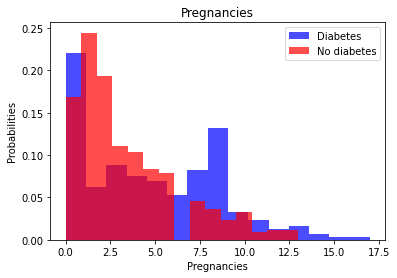

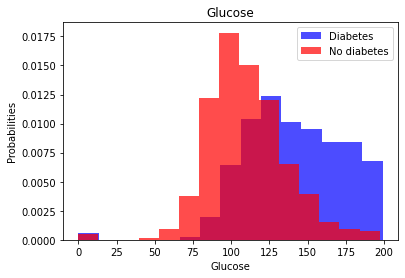

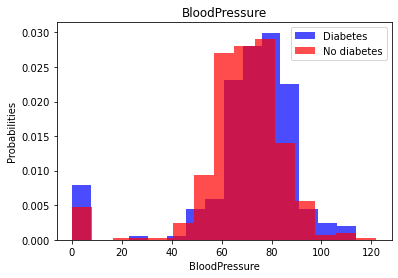

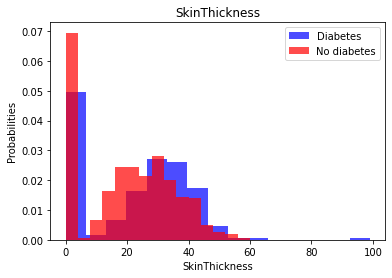

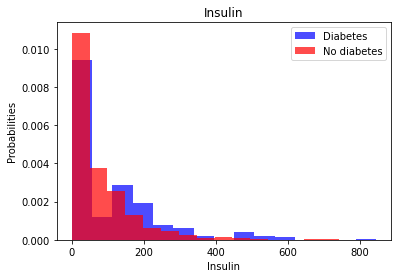

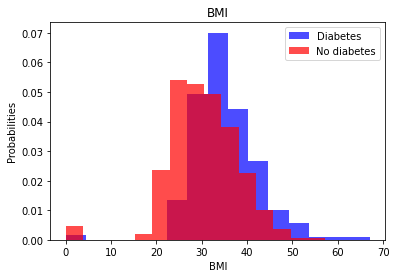

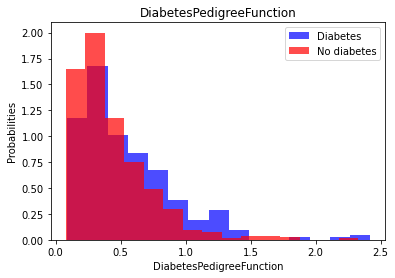

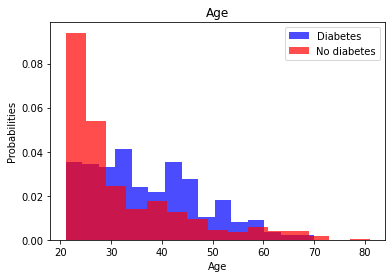

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome'] == 1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome'] == 0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probabilities")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [35]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [46]:
over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [47]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0)

In [48]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
from tensorflow.python.eager.monitoring import Metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [50]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5350


[0.7039557099342346, 0.5350000262260437]

In [52]:
model.evaluate(X_valid, Y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5550


[0.6936824321746826, 0.5550000071525574]

In [54]:
model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
38/38 [==============================] - 0s 6ms/step - loss: 0.4660 - accuracy: 0.7583 - val_loss: 0.4682 - val_accuracy: 0.7700
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.4643 - accuracy: 0.7583 - val_loss: 0.4636 - val_accuracy: 0.7600
Epoch 3/20
38/38 [==============================] - 1s 13ms/step - loss: 0.4615 - accuracy: 0.7583 - val_loss: 0.4621 - val_accuracy: 0.7550
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 0.4614 - accuracy: 0.7617 - val_loss: 0.4610 - val_accuracy: 0.7700
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 0.4571 - accuracy: 0.7617 - val_loss: 0.4600 - val_accuracy: 0.7850
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.4568 - accuracy: 0.7583 - val_loss: 0.4564 - val_accuracy: 0.7650
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.4541 - accuracy: 0.7633 - val_loss: 0.4570 - val_accuracy: 0.7850
Epoch 8/20
38/38 [

In [55]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7950


[0.4866017997264862, 0.7950000166893005]